import libraries

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

read dataset

In [199]:
titanic=pd.read_csv("Titanic-Dataset.csv")

In [200]:
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [201]:
titanic.shape

(891, 12)

data preprocessing

In [202]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [203]:
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

after drop 

In [204]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [205]:
titanic.shape


(891, 8)

handle missing values

In [206]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(titanic[['Age']])
titanic[['Age']]=imputer.transform(titanic[['Age']])

In [207]:
titanic.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q


In [208]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [209]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

C:\Users\Aasif\AppData\Local\Temp\ipykernel_18084\2104260078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)


In [210]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Encoding categorical values

In [211]:
titanic['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

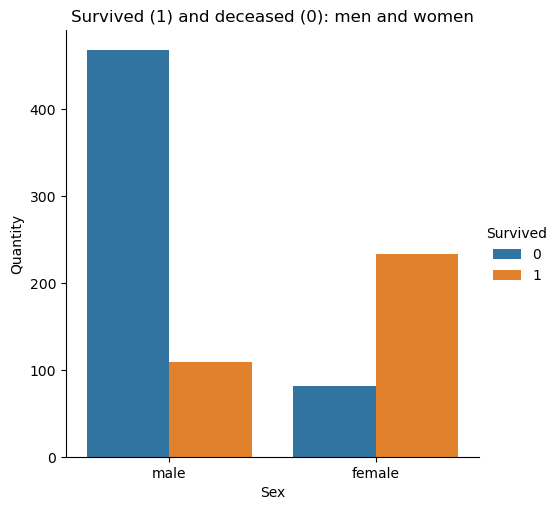

In [212]:
sns.catplot(x="Sex",kind="count", hue="Survived", data=titanic) 
plt.ylabel('Quantity') 
plt.title('Survived (1) and deceased (0): men and women') 
plt.show() 

In [213]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

replacing categorical values

In [214]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\Aasif\AppData\Local\Temp\ipykernel_18084\2574723303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [215]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

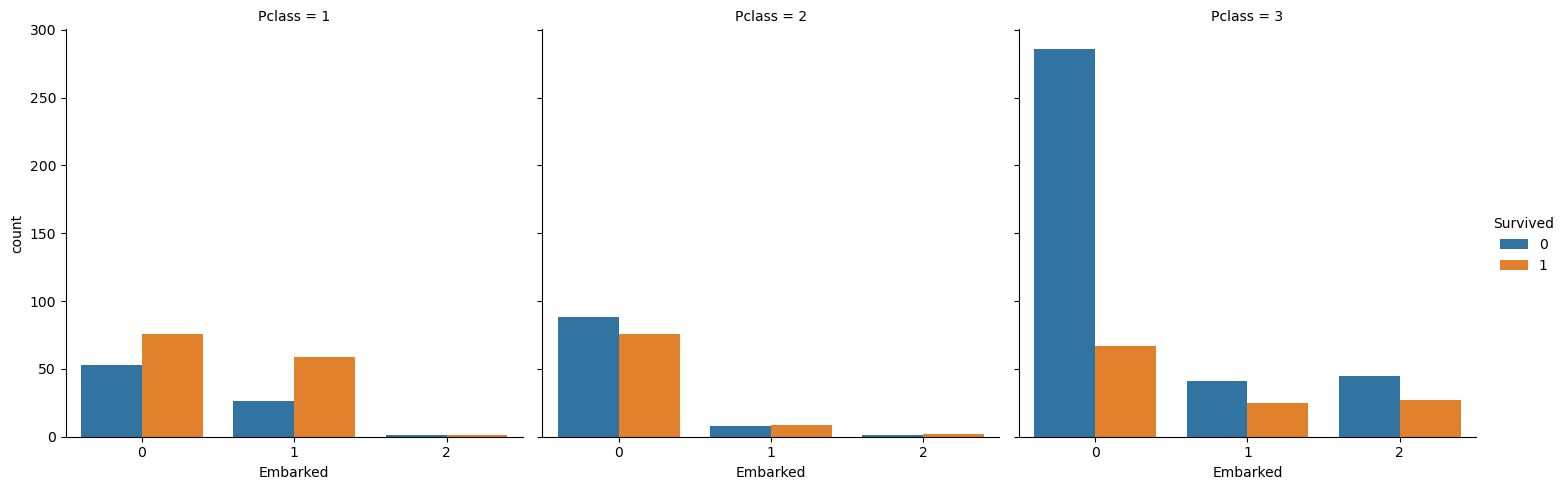

In [216]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = titanic)
plt.show()

In [217]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [218]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [219]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [220]:
cols=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
titanic[cols].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


visualization

Text(0.5, 1.0, 'Simple Heatmap')

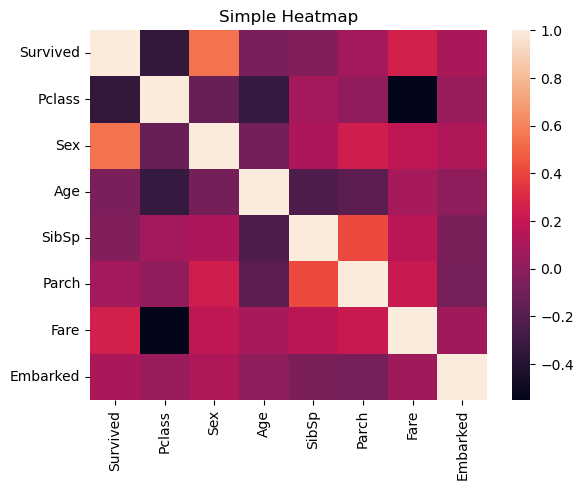

In [221]:
sns.heatmap(titanic[cols].corr())
plt.title('Simple Heatmap')

C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aasif\anaconda3\envs\bca_ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

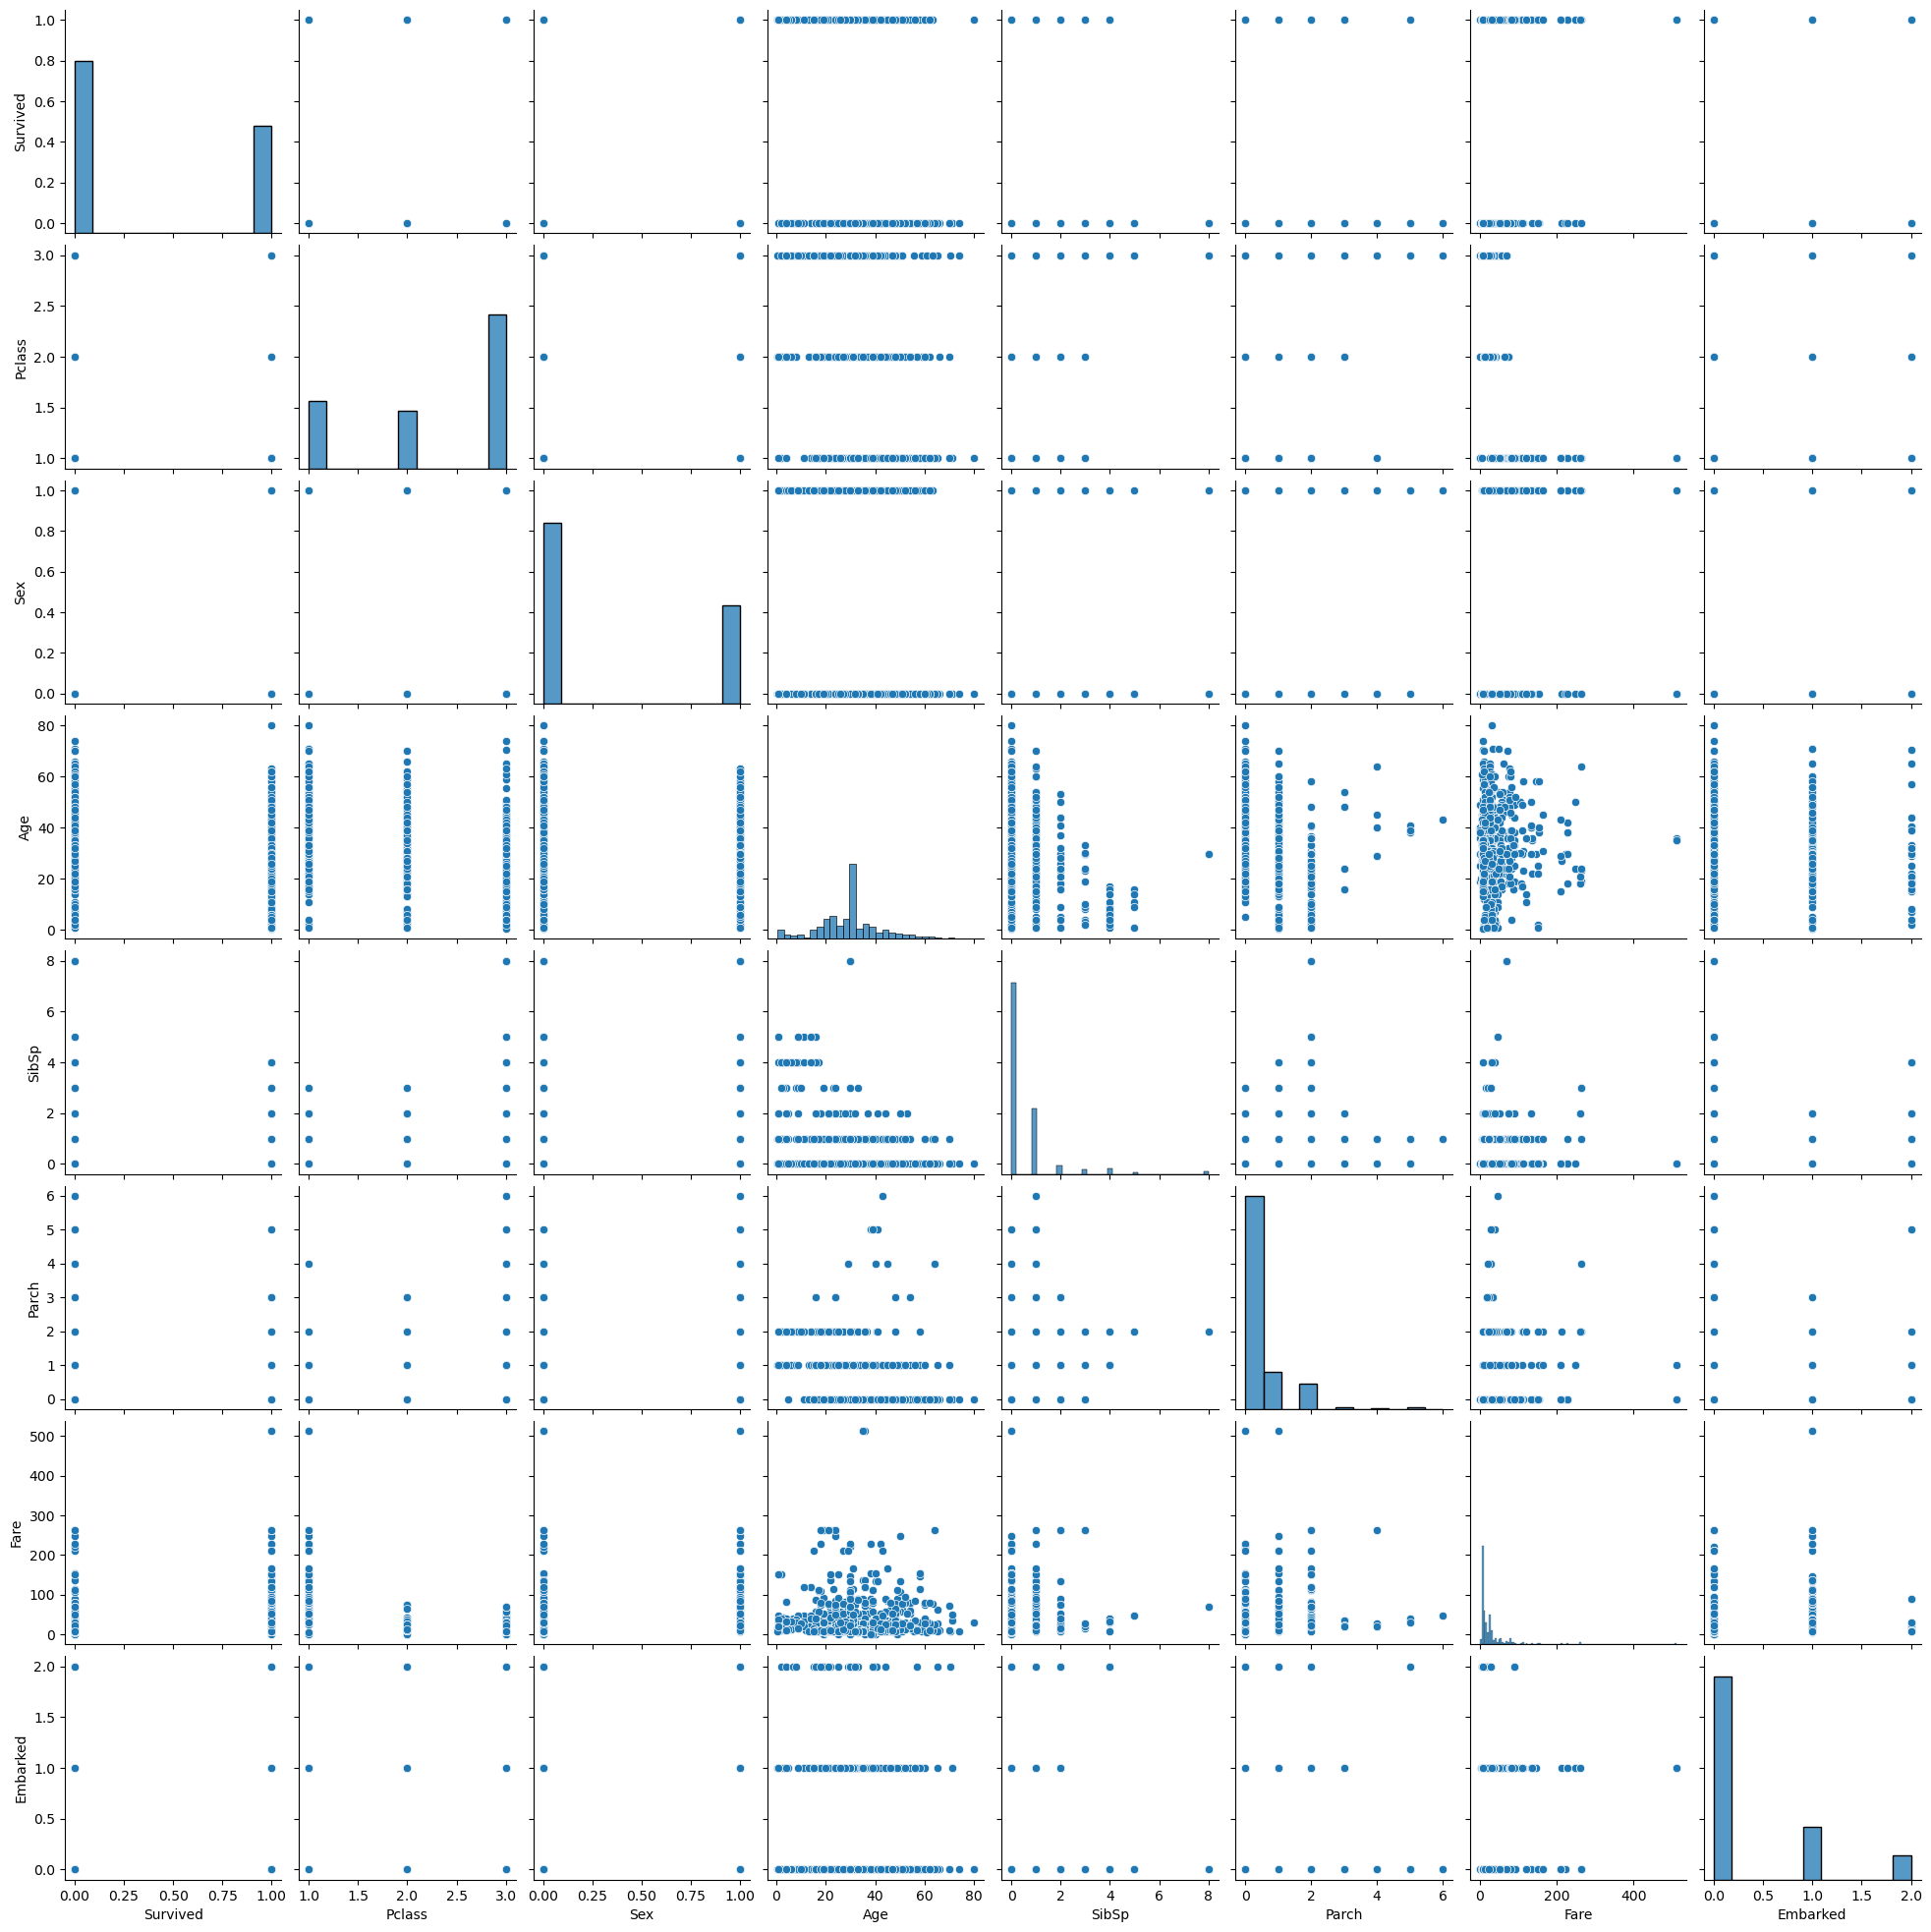

In [222]:
sns.pairplot(titanic)

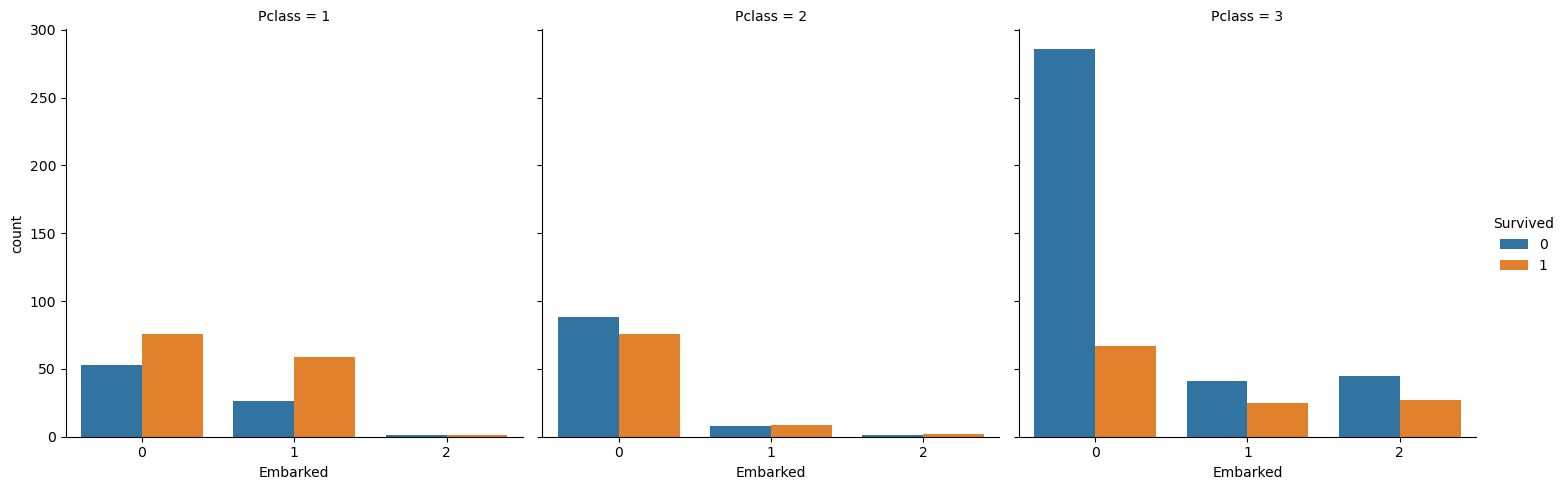

In [223]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = titanic) 

split the dataset into features and target 

In [224]:
x=titanic.iloc[:,1:]
y=titanic.iloc[:,0]

In [225]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [226]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<Axes: xlabel='Age', ylabel='Survived'>

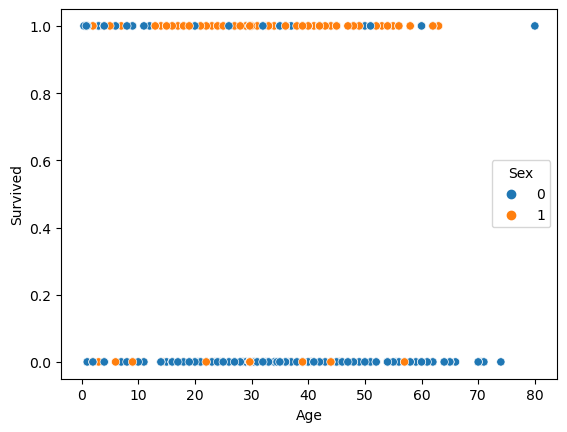

In [227]:
sns.scatterplot(data=titanic, x='Age', y='Survived',hue='Sex')

splitting dataset into training and test data

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [229]:
x_train,x_test


(     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 226       2    0  19.000000      0      0   10.5000         0
 278       3    0   7.000000      4      1   29.1250         2
 31        1    1  29.699118      1      0  146.5208         1
 449       1    0  52.000000      0      0   30.5000         0
 632       1    0  32.000000      0      0   30.5000         1
 ..      ...  ...        ...    ...    ...       ...       ...
 418       2    0  30.000000      0      0   13.0000         0
 192       3    1  19.000000      1      0    7.8542         0
 399       2    1  28.000000      0      0   12.6500         0
 484       1    0  25.000000      1      0   91.0792         1
 853       1    1  16.000000      0      1   39.4000         0
 
 [712 rows x 7 columns],
      Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 665       2    0  32.000000      2      0   73.5000         0
 336       1    0  29.000000      1      0   66.6000         0
 524       3    0  29.699118

In [230]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [231]:
lr.fit(x_train,y_train)

LogisticRegression()

In [232]:
y_pred=lr.predict(x_test)

In [233]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [234]:
lr.score(x_test,y_test)

0.8156424581005587

In [235]:
from sklearn.metrics import accuracy_score,classification_report

In [236]:
accuracy_score(y_test,y_pred)

0.8156424581005587

In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       116
           1       0.73      0.75      0.74        63

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

